In [15]:
import matplotlib.font_manager as fm
fonts = fm.findSystemFonts()
l = []
for f in fonts:
    font = fm.FontProperties(fname=f)
    l.append((f, font.get_name(), font.get_family()))
df = pd.DataFrame(l, columns=['path', 'name', 'family'])
df[df['path'].apply(lambda s: 'IPA' in s)]

,path,name,family
20,/usr/share/fonts/truetype/IPAfont00303/ipamp.ttf,IPAPMincho,[IPAPGothic]
57,/usr/share/fonts/truetype/IPAfont00303/ipagp.ttf,IPAPGothic,[IPAPGothic]
128,/usr/share/fonts/truetype/IPAfont00303/ipag.ttf,IPAGothic,[IPAPGothic]
256,/usr/share/fonts/truetype/IPAfont00303/ipam.ttf,IPAMincho,[IPAPGothic]


In [6]:
import pymysql
from pandas.io import sql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", 101)
connection = pymysql.connect(host='db', db='ritz', user='root', password='password',charset="utf8",cursorclass=pymysql.cursors.DictCursor)

In [18]:
import matplotlib
matplotlib.matplotlib_fname()

'/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [7]:
print('ショップの総売り上げ等')
sql_str = '''
SELECT
SUM(order_item_total_price) 総売上,
SUM(order_usedpoint) 総使用ポイント,
SUM(order_getpoint) 総獲得ポイント,
SUM(order_shipping_charge) 総送料,
SUM(order_cod_fee) 総手数料,
SUM(order_tax) 総消費税
FROM wp_usces_order
WHERE order_status = 'completion,'
'''
df = sql.read_sql(sql_str, connection)
df

ショップの総売り上げ等


,総売上,総使用ポイント,総獲得ポイント,総送料,総手数料,総消費税
0,11480342.0,803479.0,146356.0,102600.0,94500.0,933679.0


In [8]:
print('ショップの年別売り上げ等')
sql_str = '''
SELECT
lank 年度,
SUM(order_item_total_price) 総売上,
SUM(order_usedpoint) 総使用ポイント,
SUM(order_getpoint) 総獲得ポイント,
SUM(order_shipping_charge) 総送料,
SUM(order_cod_fee) 総手数料,
SUM(order_tax) 総消費税
FROM
(SELECT 
(CASE
WHEN `order_date` > '2014-12-31' AND `order_date` <= '2016-01-01' THEN '2015'
WHEN `order_date` > '2015-12-31' AND `order_date` <= '2017-01-01' THEN '2016'
WHEN `order_date` > '2016-12-31' AND `order_date` <= '2018-01-01' THEN '2017'
ELSE 'その他' END) AS lank,
order_item_total_price,order_usedpoint,order_getpoint,order_shipping_charge,order_cod_fee,order_tax
FROM wp_usces_order
WHERE order_status = 'completion,') AS lank
GROUP BY lank
ORDER BY lank ASC
'''
df = sql.read_sql(sql_str, connection)
df

ショップの年別売り上げ等


,年度,総売上,総使用ポイント,総獲得ポイント,総送料,総手数料,総消費税
0,2015,2033329.0,228279.0,52561.0,19400.0,11400.0,165028.0
1,2016,4887223.0,249385.0,58941.0,44500.0,50100.0,398284.0
2,2017,4559790.0,325815.0,34854.0,38700.0,33000.0,370367.0


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


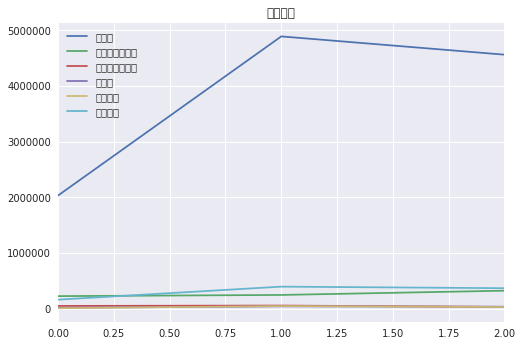

In [11]:
df.plot(title='年間売上')

In [19]:
print('ショップの年別売り上げ等')
sql_str = '''
SELECT
lank 年度,
SUM(order_item_total_price) 総売上,
SUM(order_usedpoint) 総使用ポイント,
SUM(order_getpoint) 総獲得ポイント,
SUM(order_shipping_charge) 総送料,
SUM(order_cod_fee) 総手数料,
SUM(order_tax) 総消費税
FROM
(SELECT 
(CASE
WHEN `order_date` >= '2015-01-01' AND `order_date` < '2015-02-01' THEN '2015-01'
WHEN `order_date` >= '2015-02-01' AND `order_date` < '2015-03-01' THEN '2015-02'
WHEN `order_date` >= '2015-03-01' AND `order_date` < '2015-04-01' THEN '2015-03'
WHEN `order_date` >= '2015-04-01' AND `order_date` < '2015-05-01' THEN '2015-04'
WHEN `order_date` >= '2015-05-01' AND `order_date` < '2015-06-01' THEN '2015-05'
WHEN `order_date` >= '2015-06-01' AND `order_date` < '2015-07-01' THEN '2015-06'
WHEN `order_date` >= '2015-07-01' AND `order_date` < '2015-08-01' THEN '2015-07'
WHEN `order_date` >= '2015-08-01' AND `order_date` < '2015-09-01' THEN '2015-08'
WHEN `order_date` >= '2015-09-01' AND `order_date` < '2015-10-01' THEN '2015-09'
WHEN `order_date` >= '2015-10-01' AND `order_date` < '2015-11-01' THEN '2015-10'
WHEN `order_date` >= '2015-11-01' AND `order_date` < '2015-12-01' THEN '2015-11'
WHEN `order_date` >= '2015-12-01' AND `order_date` < '2016-01-01' THEN '2015-12'
WHEN `order_date` >= '2016-01-01' AND `order_date` < '2016-02-01' THEN '2016-01'
WHEN `order_date` >= '2016-02-01' AND `order_date` < '2016-03-01' THEN '2016-02'
WHEN `order_date` >= '2016-03-01' AND `order_date` < '2016-04-01' THEN '2016-03'
WHEN `order_date` >= '2016-04-01' AND `order_date` < '2016-05-01' THEN '2016-04'
WHEN `order_date` >= '2016-05-01' AND `order_date` < '2016-06-01' THEN '2016-05'
WHEN `order_date` >= '2016-06-01' AND `order_date` < '2016-07-01' THEN '2016-06'
WHEN `order_date` >= '2016-07-01' AND `order_date` < '2016-08-01' THEN '2016-07'
WHEN `order_date` >= '2016-08-01' AND `order_date` < '2016-09-01' THEN '2016-08'
WHEN `order_date` >= '2016-09-01' AND `order_date` < '2016-10-01' THEN '2016-09'
WHEN `order_date` >= '2016-10-01' AND `order_date` < '2016-11-01' THEN '2016-10'
WHEN `order_date` >= '2016-11-01' AND `order_date` < '2016-12-01' THEN '2016-11'
WHEN `order_date` >= '2016-12-01' AND `order_date` < '2017-01-01' THEN '2016-12'
WHEN `order_date` >= '2017-01-01' AND `order_date` < '2017-02-01' THEN '2017-01'
WHEN `order_date` >= '2017-02-01' AND `order_date` < '2017-03-01' THEN '2017-02'
WHEN `order_date` >= '2017-03-01' AND `order_date` < '2017-04-01' THEN '2017-03'
WHEN `order_date` >= '2017-04-01' AND `order_date` < '2017-05-01' THEN '2017-04'
WHEN `order_date` >= '2017-05-01' AND `order_date` < '2017-06-01' THEN '2017-05'
WHEN `order_date` >= '2017-06-01' AND `order_date` < '2017-07-01' THEN '2017-06'
WHEN `order_date` >= '2017-07-01' AND `order_date` < '2017-08-01' THEN '2017-07'
WHEN `order_date` >= '2017-08-01' AND `order_date` < '2017-09-01' THEN '2017-08'
WHEN `order_date` >= '2017-09-01' AND `order_date` < '2017-10-01' THEN '2017-09'
WHEN `order_date` >= '2017-10-01' AND `order_date` < '2017-11-01' THEN '2017-10'
WHEN `order_date` >= '2017-11-01' AND `order_date` < '2017-12-01' THEN '2017-11'
WHEN `order_date` >= '2017-12-01' AND `order_date` < '2018-01-01' THEN '2017-12'
ELSE 'その他' END) AS lank,
order_item_total_price,order_usedpoint,order_getpoint,order_shipping_charge,order_cod_fee,order_tax
FROM wp_usces_order
WHERE order_status = 'completion,') AS lank
GROUP BY lank
ORDER BY lank ASC
'''
df = sql.read_sql(sql_str, connection)
df

ショップの年別売り上げ等


,年度,総売上,総使用ポイント,総獲得ポイント,総送料,総手数料,総消費税
0,2015-05,10113.0,9537.0,0.0,2500.0,0.0,1006.0
1,2015-06,37201.0,18861.0,1962.0,1000.0,0.0,3053.0
2,2015-07,52753.0,18613.0,2674.0,3500.0,0.0,4495.0
3,2015-08,71948.0,8804.0,2261.0,1500.0,0.0,5869.0
4,2015-09,303538.0,65782.0,3041.0,1500.0,2100.0,24554.0
5,2015-10,369157.0,19010.0,2386.0,2000.0,3300.0,29935.0
6,2015-11,905041.0,78508.0,30425.0,5400.0,3600.0,73089.0
7,2015-12,283578.0,9164.0,9812.0,2000.0,2400.0,23027.0
8,2016-01,622991.0,16751.0,12170.0,3400.0,6300.0,50590.0
9,2016-02,382773.0,5733.0,1926.0,3900.0,2700.0,31131.0


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


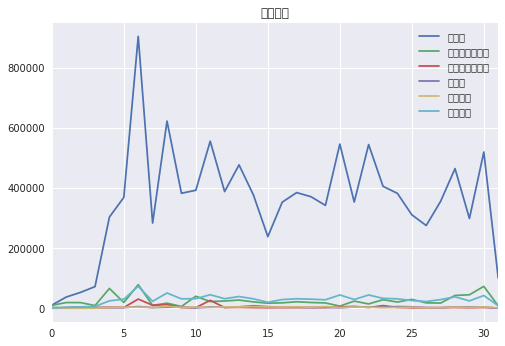

In [21]:
df.plot(title='月間売上')

In [24]:
print('キャンセル率')
sql_str = '''
SELECT COUNT(*) 総数,
COUNT(*)/(SELECT COUNT(*) FROM wp_usces_order) * 100 キャンセル率
FROM wp_usces_order
WHERE order_status = 'cancel,'
'''
df = sql.read_sql(sql_str, connection)
df

キャンセル率


,総数,キャンセル率
0,453,18.4221


In [50]:
print('キャンセル率')
sql_str = '''
SELECT 
lank 年度,
COUNT(*) 総数
FROM (SELECT 
(CASE
WHEN `order_date` >= '2015-01-01' AND `order_date` < '2015-02-01' THEN '2015-01'
WHEN `order_date` >= '2015-02-01' AND `order_date` < '2015-03-01' THEN '2015-02'
WHEN `order_date` >= '2015-03-01' AND `order_date` < '2015-04-01' THEN '2015-03'
WHEN `order_date` >= '2015-04-01' AND `order_date` < '2015-05-01' THEN '2015-04'
WHEN `order_date` >= '2015-05-01' AND `order_date` < '2015-06-01' THEN '2015-05'
WHEN `order_date` >= '2015-06-01' AND `order_date` < '2015-07-01' THEN '2015-06'
WHEN `order_date` >= '2015-07-01' AND `order_date` < '2015-08-01' THEN '2015-07'
WHEN `order_date` >= '2015-08-01' AND `order_date` < '2015-09-01' THEN '2015-08'
WHEN `order_date` >= '2015-09-01' AND `order_date` < '2015-10-01' THEN '2015-09'
WHEN `order_date` >= '2015-10-01' AND `order_date` < '2015-11-01' THEN '2015-10'
WHEN `order_date` >= '2015-11-01' AND `order_date` < '2015-12-01' THEN '2015-11'
WHEN `order_date` >= '2015-12-01' AND `order_date` < '2016-01-01' THEN '2015-12'
WHEN `order_date` >= '2016-01-01' AND `order_date` < '2016-02-01' THEN '2016-01'
WHEN `order_date` >= '2016-02-01' AND `order_date` < '2016-03-01' THEN '2016-02'
WHEN `order_date` >= '2016-03-01' AND `order_date` < '2016-04-01' THEN '2016-03'
WHEN `order_date` >= '2016-04-01' AND `order_date` < '2016-05-01' THEN '2016-04'
WHEN `order_date` >= '2016-05-01' AND `order_date` < '2016-06-01' THEN '2016-05'
WHEN `order_date` >= '2016-06-01' AND `order_date` < '2016-07-01' THEN '2016-06'
WHEN `order_date` >= '2016-07-01' AND `order_date` < '2016-08-01' THEN '2016-07'
WHEN `order_date` >= '2016-08-01' AND `order_date` < '2016-09-01' THEN '2016-08'
WHEN `order_date` >= '2016-09-01' AND `order_date` < '2016-10-01' THEN '2016-09'
WHEN `order_date` >= '2016-10-01' AND `order_date` < '2016-11-01' THEN '2016-10'
WHEN `order_date` >= '2016-11-01' AND `order_date` < '2016-12-01' THEN '2016-11'
WHEN `order_date` >= '2016-12-01' AND `order_date` < '2017-01-01' THEN '2016-12'
WHEN `order_date` >= '2017-01-01' AND `order_date` < '2017-02-01' THEN '2017-01'
WHEN `order_date` >= '2017-02-01' AND `order_date` < '2017-03-01' THEN '2017-02'
WHEN `order_date` >= '2017-03-01' AND `order_date` < '2017-04-01' THEN '2017-03'
WHEN `order_date` >= '2017-04-01' AND `order_date` < '2017-05-01' THEN '2017-04'
WHEN `order_date` >= '2017-05-01' AND `order_date` < '2017-06-01' THEN '2017-05'
WHEN `order_date` >= '2017-06-01' AND `order_date` < '2017-07-01' THEN '2017-06'
WHEN `order_date` >= '2017-07-01' AND `order_date` < '2017-08-01' THEN '2017-07'
WHEN `order_date` >= '2017-08-01' AND `order_date` < '2017-09-01' THEN '2017-08'
WHEN `order_date` >= '2017-09-01' AND `order_date` < '2017-10-01' THEN '2017-09'
WHEN `order_date` >= '2017-10-01' AND `order_date` < '2017-11-01' THEN '2017-10'
WHEN `order_date` >= '2017-11-01' AND `order_date` < '2017-12-01' THEN '2017-11'
WHEN `order_date` >= '2017-12-01' AND `order_date` < '2018-01-01' THEN '2017-12'
ELSE 'その他' END) AS lank,
order_status
FROM wp_usces_order) AS lanks
GROUP BY lank
ORDER BY lank ASC
'''
df1 = sql.read_sql(sql_str, connection)
df1

キャンセル率


,年度,総数
0,2015-05,8
1,2015-06,24
2,2015-07,21
3,2015-08,27
4,2015-09,68
5,2015-10,74
6,2015-11,104
7,2015-12,66
8,2016-01,88
9,2016-02,65


In [51]:
print('キャンセル率')
sql_str = '''
SELECT 
COUNT(*) 総数
FROM (SELECT 
(CASE
WHEN `order_date` >= '2015-01-01' AND `order_date` < '2015-02-01' THEN '2015-01'
WHEN `order_date` >= '2015-02-01' AND `order_date` < '2015-03-01' THEN '2015-02'
WHEN `order_date` >= '2015-03-01' AND `order_date` < '2015-04-01' THEN '2015-03'
WHEN `order_date` >= '2015-04-01' AND `order_date` < '2015-05-01' THEN '2015-04'
WHEN `order_date` >= '2015-05-01' AND `order_date` < '2015-06-01' THEN '2015-05'
WHEN `order_date` >= '2015-06-01' AND `order_date` < '2015-07-01' THEN '2015-06'
WHEN `order_date` >= '2015-07-01' AND `order_date` < '2015-08-01' THEN '2015-07'
WHEN `order_date` >= '2015-08-01' AND `order_date` < '2015-09-01' THEN '2015-08'
WHEN `order_date` >= '2015-09-01' AND `order_date` < '2015-10-01' THEN '2015-09'
WHEN `order_date` >= '2015-10-01' AND `order_date` < '2015-11-01' THEN '2015-10'
WHEN `order_date` >= '2015-11-01' AND `order_date` < '2015-12-01' THEN '2015-11'
WHEN `order_date` >= '2015-12-01' AND `order_date` < '2016-01-01' THEN '2015-12'
WHEN `order_date` >= '2016-01-01' AND `order_date` < '2016-02-01' THEN '2016-01'
WHEN `order_date` >= '2016-02-01' AND `order_date` < '2016-03-01' THEN '2016-02'
WHEN `order_date` >= '2016-03-01' AND `order_date` < '2016-04-01' THEN '2016-03'
WHEN `order_date` >= '2016-04-01' AND `order_date` < '2016-05-01' THEN '2016-04'
WHEN `order_date` >= '2016-05-01' AND `order_date` < '2016-06-01' THEN '2016-05'
WHEN `order_date` >= '2016-06-01' AND `order_date` < '2016-07-01' THEN '2016-06'
WHEN `order_date` >= '2016-07-01' AND `order_date` < '2016-08-01' THEN '2016-07'
WHEN `order_date` >= '2016-08-01' AND `order_date` < '2016-09-01' THEN '2016-08'
WHEN `order_date` >= '2016-09-01' AND `order_date` < '2016-10-01' THEN '2016-09'
WHEN `order_date` >= '2016-10-01' AND `order_date` < '2016-11-01' THEN '2016-10'
WHEN `order_date` >= '2016-11-01' AND `order_date` < '2016-12-01' THEN '2016-11'
WHEN `order_date` >= '2016-12-01' AND `order_date` < '2017-01-01' THEN '2016-12'
WHEN `order_date` >= '2017-01-01' AND `order_date` < '2017-02-01' THEN '2017-01'
WHEN `order_date` >= '2017-02-01' AND `order_date` < '2017-03-01' THEN '2017-02'
WHEN `order_date` >= '2017-03-01' AND `order_date` < '2017-04-01' THEN '2017-03'
WHEN `order_date` >= '2017-04-01' AND `order_date` < '2017-05-01' THEN '2017-04'
WHEN `order_date` >= '2017-05-01' AND `order_date` < '2017-06-01' THEN '2017-05'
WHEN `order_date` >= '2017-06-01' AND `order_date` < '2017-07-01' THEN '2017-06'
WHEN `order_date` >= '2017-07-01' AND `order_date` < '2017-08-01' THEN '2017-07'
WHEN `order_date` >= '2017-08-01' AND `order_date` < '2017-09-01' THEN '2017-08'
WHEN `order_date` >= '2017-09-01' AND `order_date` < '2017-10-01' THEN '2017-09'
WHEN `order_date` >= '2017-10-01' AND `order_date` < '2017-11-01' THEN '2017-10'
WHEN `order_date` >= '2017-11-01' AND `order_date` < '2017-12-01' THEN '2017-11'
WHEN `order_date` >= '2017-12-01' AND `order_date` < '2018-01-01' THEN '2017-12'
ELSE 'その他' END) AS lank,
order_status
FROM wp_usces_order) AS lanks
WHERE order_status = 'cancel,'
GROUP BY lank
ORDER BY lank ASC
'''
df2 = sql.read_sql(sql_str, connection)
df2

キャンセル率


,総数
0,3
1,3
2,1
3,1
4,12
5,15
6,16
7,16
8,11
9,11


月間キャンセル


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


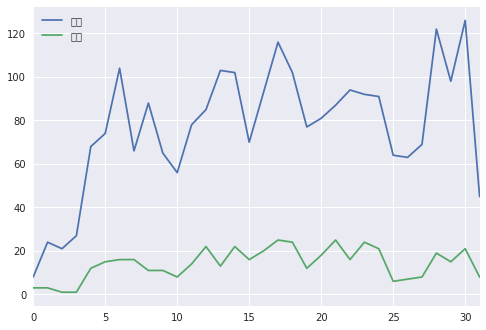

In [61]:
print('月間キャンセル')
df = pd.concat([df1, df2], axis=1)
df.plot(kind='line')

In [69]:
print('購入方法の割合')
sql_str = '''
SELECT order_payment_name 購入方法, 
COUNT(*) 総数,
COUNT(*)/(SELECT COUNT(*) FROM wp_usces_order) * 100 パーセント
FROM wp_usces_order
GROUP BY order_payment_name
'''
df = sql.read_sql(sql_str, connection)
df

購入方法の割合


,購入方法,総数,パーセント
0,#none#,1,0.0407
1,クレジット,1037,42.1716
2,クレジット・全額ポイント決済,6,0.2440
3,ペイジー・コンビニ,2,0.0813
4,ペイジー・コンビニ・全額ポイント決済,56,2.2773
5,代金引換,1030,41.8869
6,全額ポイント決済,327,13.2981


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


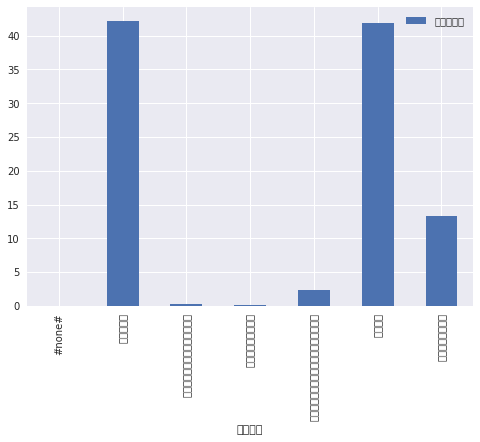

In [70]:
df.plot.bar(x='購入方法', y='パーセント')

In [71]:
print('受注の都道府県の割合')
sql_str = '''
SELECT order_pref 都道府県, 
COUNT(*) 総数,
COUNT(*)/(SELECT COUNT(*) FROM wp_usces_order) * 100 パーセント
FROM wp_usces_order
GROUP BY order_pref
ORDER BY 総数 DESC
'''
df = sql.read_sql(sql_str, connection)
df

受注の都道府県の割合


,都道府県,総数,パーセント
0,大阪府,466,18.9508
1,兵庫県,321,13.0541
2,東京都,140,5.6934
3,愛知県,136,5.5307
4,神奈川県,128,5.2054
5,和歌山県,93,3.7820
6,京都府,80,3.2534
7,千葉県,74,3.0094
8,静岡県,74,3.0094
9,福岡県,72,2.9280


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


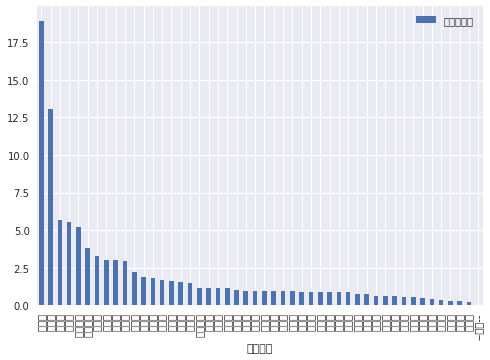

In [72]:
df.plot.bar(x='都道府県', y='パーセント')

In [79]:
# 受注の価格帯
sql_str = '''
SELECT lank 価格帯,
COUNT(*) 総数,
COUNT(*)/(SELECT COUNT(*) FROM wp_usces_order) * 100 パーセント,
SUM(order_item_total_price)　総売上,
SUM(order_item_total_price)/(SELECT SUM(order_item_total_price) FROM wp_usces_order) * 100 売上パーセント
FROM
(SELECT
(CASE
WHEN `order_item_total_price` > 0 AND `order_item_total_price` <= 1000 THEN '0~1000'
WHEN `order_item_total_price` > 1000 AND `order_item_total_price` <= 2000 THEN '01000~2000'
WHEN `order_item_total_price` > 2000 AND `order_item_total_price` <= 3000 THEN '02000~3000'
WHEN `order_item_total_price` > 3000 AND `order_item_total_price` <= 4000 THEN '03000~4000'
WHEN `order_item_total_price` > 4000 AND `order_item_total_price` <= 5000 THEN '04000~5000'
WHEN `order_item_total_price` > 5000 AND `order_item_total_price` <= 6000 THEN '05000~6000'
WHEN `order_item_total_price` > 6000 AND `order_item_total_price` <= 7000 THEN '06000~7000'
WHEN `order_item_total_price` > 7000 AND `order_item_total_price` <= 8000 THEN '07000~8000'
WHEN `order_item_total_price` > 8000 AND `order_item_total_price` <= 9000 THEN '08000~9000'
WHEN `order_item_total_price` > 9000 AND `order_item_total_price` <= 10000 THEN '09000~10000'
WHEN `order_item_total_price` > 10000 AND `order_item_total_price` <= 11000 THEN '10000~11000'
WHEN `order_item_total_price` > 11000 AND `order_item_total_price` <= 12000 THEN '11000~12000'
WHEN `order_item_total_price` > 12000 AND `order_item_total_price` <= 13000 THEN '12000~13000'
ELSE 'その他' END) AS lank,
order_item_total_price
FROM `wp_usces_order`) as lank
GROUP BY lank
ORDER BY lank ASC
'''
df = sql.read_sql(sql_str, connection)
df

,価格帯,総数,パーセント,総売上,売上パーセント
0,01000~2000,200,8.1334,308547.0,1.790700
1,02000~3000,163,6.6287,415110.0,2.409155
2,03000~4000,723,29.4022,2471598.0,14.344301
3,04000~5000,294,11.9561,1314712.0,7.630134
4,05000~6000,244,9.9227,1339692.0,7.775110
5,06000~7000,127,5.1647,830322.0,4.818902
6,07000~8000,123,5.0020,919259.0,5.335062
7,08000~9000,74,3.0094,627444.0,3.641468
8,09000~10000,54,2.1960,515353.0,2.990931
9,0~1000,73,2.9687,53278.0,0.309207


In [87]:
# 受注ごとの商品販売商品数
sql_str = '''
SELECT count 販売商品数,
COUNT(count) この販売商品数だったものの総数,
COUNT(count)/(SELECT COUNT(*) FROM wp_usces_order) * 100 as パーセント
FROM
(SELECT count(oc.order_id) count, SUM(oc.price) sum FROM wp_usces_order wo
INNER JOIN wp_usces_ordercart oc
ON wo.ID = oc.order_id
GROUP BY oc.order_id) order_count
GROUP BY count
'''
df = sql.read_sql(sql_str, connection)
df

,販売商品数,この販売商品数だったものの総数,パーセント
0,1,1364,55.4697
1,2,537,21.8381
2,3,272,11.0614
3,4,128,5.2054
4,5,52,2.1147
5,6,36,1.4640
6,7,18,0.7320
7,8,14,0.5693
8,9,7,0.2847
9,10,8,0.3253


In [89]:
# 受注商品の価格帯
sql_str = '''
SELECT lank 価格帯,
COUNT(*) 総数, 
COUNT(*)/(SELECT COUNT(*) FROM wp_usces_ordercart) * 100 パーセント,
SUM(price)　総売上,
SUM(price)/(SELECT SUM(price) FROM wp_usces_ordercart) * 100 売上パーセント
FROM
(SELECT
(CASE
WHEN `price` > 0 AND `price` <= 1000 THEN '0~1000'
WHEN `price` > 1000 AND `price` <= 2000 THEN '01000=2000'
WHEN `price` > 2000 AND `price` <= 3000 THEN '02000~3000'
WHEN `price` > 3000 AND `price` <= 4000 THEN '03000~4000'
WHEN `price` > 4000 AND `price` <= 5000 THEN '04000~5000'
WHEN `price` > 5000 AND `price` <= 6000 THEN '05000~6000'
WHEN `price` > 6000 AND `price` <= 7000 THEN '06000~7000'
WHEN `price` > 7000 AND `price` <= 8000 THEN '07000~8000'
WHEN `price` > 8000 AND `price` <= 9000 THEN '08000~9000'
WHEN `price` > 9000 AND `price` <= 10000 THEN '09000~10000'
WHEN `price` > 10000 AND `price` <= 11000 THEN '10000~11000'
WHEN `price` > 11000 AND `price` <= 12000 THEN '11000~12000'
WHEN `price` > 12000 AND `price` <= 13000 THEN '12000~13000'
ELSE 'その他' END) AS lank,
price
FROM `wp_usces_ordercart`) as lank
GROUP BY lank
ORDER BY lank ASC
'''
df = sql.read_sql(sql_str, connection)
df

,価格帯,総数,パーセント,総売上,売上パーセント
0,01000=2000,1767,35.9146,2605054.0,18.461790
1,02000~3000,563,11.4431,1409854.0,9.991512
2,03000~4000,426,8.6585,1476787.0,10.465860
3,04000~5000,147,2.9878,658844.0,4.669170
4,05000~6000,77,1.5650,426857.0,3.025098
5,06000~7000,38,0.7724,248769.0,1.763004
6,07000~8000,46,0.9350,343891.0,2.437125
7,08000~9000,21,0.4268,177490.0,1.257856
8,09000~10000,22,0.4472,210323.0,1.490541
9,0~1000,1567,31.8496,1073250.0,7.606029


In [102]:
print('商品ジャンル 売り上げ個数ランク')
sql_str = '''
SELECT wt.name ジャンル名,
COUNT(wt.name) 総数
FROM `wp_usces_ordercart`oc
INNER JOIN wp_posts po
ON oc.post_id = po.ID
INNER JOIN wp_term_relationships wtr
ON po.ID = wtr.object_id
INNER JOIN wp_term_taxonomy wtt
ON wtr.term_taxonomy_id = wtt.term_taxonomy_id
INNER JOIN wp_terms wt
ON wtt.term_id = wt.term_id
WHERE wtt.parent = 5
GROUP BY wt.name
ORDER BY 総数 DESC
'''
df = sql.read_sql(sql_str, connection)
df

商品ジャンル 売り上げ個数ランク


,ジャンル名,総数
0,エサ釣り仕掛け,550
1,ルアー,502
2,ジグ,485
3,ライン,433
4,エギ,427
5,ツール,350
6,エサ釣り用バラ針・オモリ,235
7,ロッド,211
8,ルアー用フック・シンカー,161
9,スッテ・イカヅノ,152


In [105]:
# 釣り方 売り上げ個数ランク
sql_str = '''
SELECT wt.name as 釣り方,
COUNT(wt.name) 総数
FROM `wp_usces_ordercart`oc
INNER JOIN wp_posts po
ON oc.post_id = po.ID
INNER JOIN wp_term_relationships wtr
ON po.ID = wtr.object_id
INNER JOIN wp_term_taxonomy wtt
ON wtr.term_taxonomy_id = wtt.term_taxonomy_id
INNER JOIN wp_terms wt
ON wtt.term_id = wt.term_id
WHERE wtt.parent IN (221,231,246,256)
GROUP BY wt.name
ORDER BY 総数 DESC
'''
df = sql.read_sql(sql_str, connection)
df

,釣り方,総数
0,シーバス,1079
1,アジング・メバリング,1055
2,ライトゲーム,1009
3,ジギング,999
4,エギング,982
5,ショアジギング,851
6,ロックフィッシュ,816
7,ボートシーバス,805
8,ボートエギング,761
9,チヌ・クロダイゲーム,707


In [33]:
SELECT
wt.name
FROM wp_terms wp_terms
INNER JOIN wp_term_taxonomy wtt
ON wtt.term_id = wt.term_id
WHERE wtt.parent IN (272)
GROUP BY wt.name

SyntaxError: invalid syntax (<ipython-input-33-19b68ebed4d0>, line 3)

In [28]:
# メーカー 売り上げランク
sql_str = '''
SELECT wt.name メーカー,
COUNT(wt.name) 総数,
COUNT( CASE when wo.order_status LIKE '%cancel%' then wt.name ELSE NULL END  ) キャンセル総数,
SUM(oc.price) 売上
FROM `wp_usces_ordercart`oc
INNER JOIN wp_usces_order wo
ON wo.ID = oc.order_id
INNER JOIN wp_posts po
ON oc.post_id = po.ID
INNER JOIN wp_term_relationships wtr
ON po.ID = wtr.object_id
INNER JOIN wp_term_taxonomy wtt
ON wtr.term_taxonomy_id = wtt.term_taxonomy_id
INNER JOIN wp_terms wt
ON wtt.term_id = wt.term_id
WHERE wtt.parent IN (272)
GROUP BY wt.name
ORDER BY 総数 DESC
'''
df = sql.read_sql(sql_str, connection)
df

/opt/conda/lib/python3.6/site-packages/pymysql/cursors.py:322: Warning: (1292, "Truncated incorrect INTEGER value: 'ダイワ'")
  self._do_get_result()
/opt/conda/lib/python3.6/site-packages/pymysql/cursors.py:322: Warning: (1292, "Truncated incorrect INTEGER value: 'シマノ'")
  self._do_get_result()
/opt/conda/lib/python3.6/site-packages/pymysql/cursors.py:322: Warning: (1292, "Truncated incorrect INTEGER value: 'ハリミツ'")
  self._do_get_result()
/opt/conda/lib/python3.6/site-packages/pymysql/cursors.py:322: Warning: (1292, "Truncated incorrect INTEGER value: 'シャウト！'")
  self._do_get_result()
/opt/conda/lib/python3.6/site-packages/pymysql/cursors.py:322: Warning: (1292, "Truncated incorrect INTEGER value: '明邦化学'")
  self._do_get_result()


,メーカー,総数,キャンセル総数,売上
0,ささめ針,435,34,633182.0
1,ハリミツ,273,31,548172.0
2,エバーグリーン,237,5,527450.0
3,がまかつ,222,29,686899.0
4,シャウト！,212,4,313065.0
5,YGKよつあみ,211,22,458692.0
6,クレイジーオーシャン,205,16,638394.0
7,プロックス(PROX),205,31,616749.0
8,デュエル(DUEL・YO-ZURI),170,34,181278.0
9,墨族,154,21,115256.0


In [107]:
# 問屋 売り上げランク
sql_str = '''
SELECT wt.name 問屋,
COUNT(wt.name) 総数
FROM `wp_usces_ordercart`oc
INNER JOIN wp_posts po
ON oc.post_id = po.ID
INNER JOIN wp_term_relationships wtr
ON po.ID = wtr.object_id
INNER JOIN wp_term_taxonomy wtt
ON wtr.term_taxonomy_id = wtt.term_taxonomy_id
INNER JOIN wp_terms wt
ON wtt.term_id = wt.term_id
WHERE wtt.parent IN (281)
GROUP BY wt.name
ORDER BY 総数 DESC
'''
df = sql.read_sql(sql_str, connection)
df

,問屋,総数
0,松浦テグス,1621
1,魚矢,1335
2,中央漁具,721
3,大阪漁具,261
4,株式会社デュエル,170
5,谷山商事,122
6,株式会社ルミカ,80
7,メジャー,21


In [113]:
# 商品個別 売り上げランク
sql_str = '''
SELECT oc.item_name 商品名,
COUNT(post_id) 販売回数,
COUNT(post_id)/(SELECT COUNT(*) FROM wp_usces_ordercart) * 100 パーセント,
SUM(quantity) 販売総数
FROM `wp_usces_ordercart` oc
GROUP BY oc.item_name
ORDER BY 販売回数 DESC
'''
df = sql.read_sql(sql_str, connection)
df

,商品名,販売回数,パーセント,販売総数
0,鉛トンボニューパール,66,1.3415,73.0
1,ジャベリンジェット 小型回遊魚対応モデル,64,1.3008,91.0
2,スライドアンサーヘッド,47,0.9553,61.0
3,SHORESストリーマー（ショアーズ ストリーマー）,38,0.7724,42.0
4,ブラックダイニーマ（グランドスーパーＰＥブラック） 100ｍ連結,30,0.6098,99.0
5,ガンガンジグ２,30,0.6098,34.0
6,クレイドル,26,0.5285,27.0
7,ハオリ・スリム&ロング,24,0.4878,26.0
8,サーフェスウィング １４７Ｆ,24,0.4878,32.0
9,極テンヤ船用 ラメ,22,0.4472,80.0
